# Lesson 08
# Peter Lorenz

## 0. Preparation
Import required libraries:

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Set global options:

In [3]:
# Display plots inline
%matplotlib inline

# Display multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress scientific notation
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Declare functions:

In [60]:
# Activation function
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1/(1 + np.exp(-x))

# Initializes parameters to random values
def init_parameters(dim1, dim2 = 1, std = 1e-1, random = True):
    if(random):
        return(np.random.random([dim1, dim2]) * std)
    else:
        return(np.zeros([dim1, dim2]))

# Perform forward pass
def forward(W1, bias, X):
    Z1 = np.dot(X, W1) + bias
    A1 = sigmoid(Z1)
    return(A1)

# Perform backward pass
def backward(A1, W1, bias, X, Y):
    m = np.shape(X)[0] # used the calculate the cost by the number of inputs -1/m
   
    loss = Y * np.log(A1) + (1 - Y)*np.log(1 - A1)           # loss at each row
    cost = (-1/m) * np.sum(loss)                             # loss across all rows
    dZ1 = A1 - Y                                             # derivative of loss wrt Z1
    dW1 = (1/m) * np.dot(X.T, dZ1)                           # derivative of loss wrt weights
    dBias = (1/m) * np.sum(dZ1, axis = 0, keepdims = True) # derivative of loss wrt bias
    
    # Homework: measure derivative loss with respect to Z2 then Z1
    
    
    grads = {"dW1": dW1, "dB1": dBias}                       # updated weights and biases
    
    return(grads, cost)

# Perform gradient descent
def run_grad_desc(num_epochs, learning_rate, X, Y):
    
    m, input_cols = X.shape
    
    W1 = init_parameters(input_cols, output_cols)
    B1 = init_parameters(output_cols)
    
    loss_array = np.ones([num_epochs])*np.nan     # place-holder of keeping track of loss
    
    for i in np.arange(num_epochs):
        A1 = forward(W1, B1, X)                   # get activations in final layer
        grads, cost = backward(A1, W1, B1, X, Y)  # get gradient and the cost from BP 
        
        W1 = W1 - learning_rate*grads["dW1"]      # update weights
        B1 = B1 - learning_rate*grads["dB1"]      # update bias
        
        loss_array[i] = cost                      # record loss for current iteration
        
        parameter = {"W1": W1, "B1": B1}          # record parameters for current iteration
    
    return(parameter, loss_array)

## 1. Use the provided RedWhiteWine.csv file
In this section, we load and prepare the provided RedWhiteWine.csv file. We include all features, using “Class” as the output vector. First we read and prepare the data:

In [85]:
# Internet location of the data set
url = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/RedWhiteWine.csv"

# Download the data into a dataframe object
wine_data = pd.read_csv(url)

# Display shape and initial data
wine_data.shape
wine_data.head()

# Examine column types
wine_data.info()

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,1
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,1
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6,1
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Next we set aside the output variable:

In [86]:
# Set aside the output variable
output = wine_data['Class']

# Drop output from main data frame
wine_data = wine_data.drop('Class', axis=1)
wine_data.shape

(6497, 12)

Now we scale the features:

In [87]:
# Scale data
scaler = StandardScaler()
wine_data = pd.DataFrame(scaler.fit_transform(wine_data), 
                         columns=wine_data.columns)

# Display scaled data set
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142,2.189,-2.193,-0.745,0.570,-1.100,-1.446,1.035,1.813,0.193,-0.915,-0.937
1,0.451,3.282,-2.193,-0.598,1.198,-0.311,-0.862,0.701,-0.115,1.000,-0.580,-0.937
2,0.451,2.553,-1.918,-0.661,1.027,-0.875,-1.092,0.768,0.258,0.798,-0.580,-0.937
3,3.074,-0.362,1.661,-0.745,0.541,-0.762,-0.986,1.102,-0.364,0.328,-0.580,0.208
4,0.142,2.189,-2.193,-0.745,0.570,-1.100,-1.446,1.035,1.813,0.193,-0.915,-0.937


To prepare for building our network, we partition the data set into training and test data, reserving 10% of the data for test:

In [88]:
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    output, 
                                                    test_size = 0.5,
                                                    random_state = 0)

# Convert output to arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Describe training and test data sets
print("Training data has {} rows.".format(X_train.shape[0]))
print("Test data has {} rows.".format(X_test.shape[0]))

Training data has 3248 rows.
Test data has 3249 rows.


## 2. Develop multi-layer feed-forward/backpropagation neural network
In this section, we use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network. We begin with a single forward pass:

In [89]:
# Determine data set dimensions
_, input_cols = X_train.shape

# only one output column
output_cols = 1

# Initialize parameters
weights = init_parameters(input_cols, output_cols)
bias = init_parameters(output_cols)

# Display dimensions
print("Checking dimensions: {} * {} + {}".format(X_train.shape, weights.shape, bias.shape))

# Perform forward pass and display predictions
pred = forward(weights, bias, X_train)
pred

Checking dimensions: (3248, 12) * (12, 1) + (1, 1)


array([[0.565],
       [0.563],
       [0.536],
       ...,
       [0.527],
       [0.537],
       [0.476]])

Next we test the backward pass:

In [27]:
# Perform backward pass
gradients, _ = backward(pred, weights, bias, X_train, y_train)
gradients

{'dW1': array([[ 0.005,  0.005,  0.006, ...,  0.005,  0.005,  0.005],
        [ 0.019,  0.019,  0.018, ...,  0.019,  0.019,  0.019],
        [ 0.001,  0.001,  0.001, ...,  0.001,  0.001,  0.001],
        ...,
        [ 0.017,  0.017,  0.017, ...,  0.017,  0.017,  0.017],
        [-0.005, -0.005, -0.003, ..., -0.005, -0.005, -0.005],
        [-0.003, -0.003, -0.002, ..., -0.003, -0.003, -0.003]]),
 'dB1': array([[ 0.501,  0.501, -0.499, ...,  0.501,  0.501,  0.501]])}

With our functions tested, we perform gradient descent for 1000 iterations to see our neural network in action:

In [30]:
# Perform gradient descent
num_epochs = 100
learning_rate = 0.01
params, loss_array = run_grad_desc(num_epochs, learning_rate, X_train, y_train)

In [36]:
# Display final parameters
print(params['B1'][0])
print(params['W1'].ravel())

[-0.429 -0.429  0.458 ... -0.429 -0.429 -0.429]
[0.016 0.016 0.016 ... 0.04  0.04  0.04 ]


Now we display the predictions from our neural network:

In [84]:
len(params['B1'][0])

5847

In [69]:
# Compute final predictions from training params
Y_pred_nn = forward(params['W1'], params['B1'], X_train)[0]

# Convert probabilities to binary
Y_pred_nn = np.where(Y_pred_nn > 0.5, 1, 0)

# Compare predictions to actual
np.hstack([Y_pred_nn, y_train])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
# Compute final predictions from training params
y_pred = forward(params['W1'], params['B1'], X_test)[0]

# Convert probabilities to binary
y_pred = np.where(y_pred > 0.5, 1, 0)

# Compare predictions to actual
np.hstack([y_pred, y_test])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [72]:
# Display confusion matrix
print(confusion_matrix(y_test, y_pred))

# Display performance metrics
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [650, 5847]

Finally, we plot the loss:

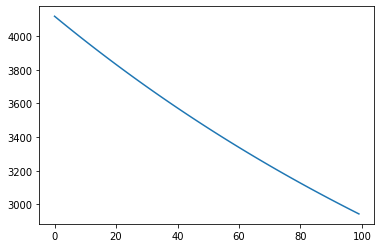

In [51]:
# Plot the loss per epoch
sns.lineplot(data = loss_array)

Now that we have trained our initial neural network, we are ready to experiment with the parameters.

## 3. Adjust the following between experiments:
In this section, we adjust various settings and run experiments.

### Learning Rate
In this section, we adjust the learning rate.

### Number of epochs
In this section, we adjust the number of epochs.

### Depth of architecture
In this section, we adjust the depth of the architecture, that is, the number of hidden layers between the input and output layers.

### Number of nodes per hidden layer
In this section, we adjust the number of nodes in a hidden layer, the width of the hidden layers.

## 4. Determine best neural network structure and settings
In this section, we determine the best neural network structure and hyperparameter settings, resulting in the best predictive capability.

## Summary
In this assignment, we ...